In [19]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error as mse
import seaborn as sns
from sklearn import tree
from pprint import pprint

df is trending data from August 2020 - mid October 2020. This was used as the training dataset. df2 is the test set and spans from mid October to early November 2020.

In [20]:
df=pd.read_csv('US_youtube_trending_data.csv')
df2=pd.read_csv('US_youtube_trending_data1.csv')

In [21]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [22]:
df=df.drop(df[['video_id','title','channelTitle','thumbnail_link','tags','description','comments_disabled','ratings_disabled']], axis=1)
df2=df2.drop(df2[['video_id','title','channelTitle','thumbnail_link','tags','description','comments_disabled','ratings_disabled']], axis=1)

In [23]:
df.isnull().any()
df['publishedAt']=pd.to_datetime(df['publishedAt']).dt.tz_localize(None)
df['trending_date']=pd.to_datetime(df['trending_date']).dt.tz_localize(None)
df1=df

df2.isnull().any()
df2['publishedAt']=pd.to_datetime(df2['publishedAt']).dt.tz_localize(None)
df2['trending_date']=pd.to_datetime(df2['trending_date']).dt.tz_localize(None)
df3=df2

In [24]:
df1.dtypes

publishedAt      datetime64[ns]
channelId                object
categoryId                int64
trending_date    datetime64[ns]
view_count                int64
likes                     int64
dislikes                  int64
comment_count             int64
dtype: object

In [25]:
df1.head()

,publishedAt,channelId,categoryId,trending_date,view_count,likes,dislikes,comment_count
0,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,22,2020-08-12,1514614,156908,5855,35313
1,2020-08-11 17:00:10,UC0ZV6M2THA81QT9hrVWJG3A,20,2020-08-12,2381688,146739,2794,16549
2,2020-08-11 16:34:06,UCYzPXprvl5Y-Sf0g4vX-m6g,24,2020-08-12,2038853,353787,2628,40221
3,2020-08-11 16:38:55,UCbg_UMjlHJg_19SZckaKajg,10,2020-08-12,496771,23251,1856,7647
4,2020-08-11 15:10:05,UCDVPcEbVLQgLZX0Rt6jo34A,26,2020-08-12,1123889,45802,964,2196


In [26]:
df1.sort_values(by=['publishedAt'], inplace=True)
df3.sort_values(by=['publishedAt'], inplace=True)

In [27]:
df1.head(10)

,publishedAt,channelId,categoryId,trending_date,view_count,likes,dislikes,comment_count
536,2020-08-03 21:51:14,UCa0LID3WQdj-bd5KiI-34vw,27,2020-08-14,2376265,100124,1834,1592
757,2020-08-03 21:51:14,UCa0LID3WQdj-bd5KiI-34vw,27,2020-08-15,3146234,123862,2410,1865
94,2020-08-03 21:51:14,UCa0LID3WQdj-bd5KiI-34vw,27,2020-08-12,1048314,51361,891,965
313,2020-08-03 21:51:14,UCa0LID3WQdj-bd5KiI-34vw,27,2020-08-13,1686474,76387,1384,1313
183,2020-08-05 19:00:01,UCIcgBZ9hEJxHv6r_jDYOMqg,23,2020-08-12,4971181,360168,7850,48742
198,2020-08-05 19:42:52,UCWTQG2aMDYKGDqYEGqJb1FA,24,2020-08-12,1123529,39289,2056,3626
180,2020-08-05 21:01:33,UCoMdktPbSTixAyNGwb-UYkQ,25,2020-08-12,8496552,74508,3034,11855
197,2020-08-05 21:07:19,UC6QWhGQqf0YDYdRb0n6ojWw,24,2020-08-12,1120675,41671,888,5282
193,2020-08-06 00:00:01,UCYUbNjkuE4lsr2v1Id2O1oA,25,2020-08-12,1793900,14805,1082,4037
195,2020-08-06 00:54:06,UC5T7D-Dh1eDGtsAFCuwv_Sw,25,2020-08-12,1256376,7475,414,1835


In [28]:
df1['publishedAt1']=pd.to_datetime(df1['publishedAt'])
df1['publishedAt1']=df1['publishedAt1'].map(dt.datetime.toordinal)
df1.drop('publishedAt', axis=1, inplace=True)

df3['publishedAt1']=pd.to_datetime(df3['publishedAt'])
df3['publishedAt1']=df3['publishedAt1'].map(dt.datetime.toordinal)
df3.drop('publishedAt', axis=1, inplace=True)

In [29]:
df1.head(10)

,channelId,categoryId,trending_date,view_count,likes,dislikes,comment_count,publishedAt1
536,UCa0LID3WQdj-bd5KiI-34vw,27,2020-08-14,2376265,100124,1834,1592,737640
757,UCa0LID3WQdj-bd5KiI-34vw,27,2020-08-15,3146234,123862,2410,1865,737640
94,UCa0LID3WQdj-bd5KiI-34vw,27,2020-08-12,1048314,51361,891,965,737640
313,UCa0LID3WQdj-bd5KiI-34vw,27,2020-08-13,1686474,76387,1384,1313,737640
183,UCIcgBZ9hEJxHv6r_jDYOMqg,23,2020-08-12,4971181,360168,7850,48742,737642
198,UCWTQG2aMDYKGDqYEGqJb1FA,24,2020-08-12,1123529,39289,2056,3626,737642
180,UCoMdktPbSTixAyNGwb-UYkQ,25,2020-08-12,8496552,74508,3034,11855,737642
197,UC6QWhGQqf0YDYdRb0n6ojWw,24,2020-08-12,1120675,41671,888,5282,737642
193,UCYUbNjkuE4lsr2v1Id2O1oA,25,2020-08-12,1793900,14805,1082,4037,737643
195,UC5T7D-Dh1eDGtsAFCuwv_Sw,25,2020-08-12,1256376,7475,414,1835,737643


In order to train the regression models on the Time Series data, I had to convert the dates to ordinal numbers after putting them in chronological order. 

In [30]:
df1['trending_date1']=pd.to_datetime(df1['trending_date'])
df1['trending_date1']=df1['trending_date1'].map(dt.datetime.toordinal)
df1.drop('trending_date', axis=1, inplace=True)

df3['trending_date1']=pd.to_datetime(df3['trending_date'])
df3['trending_date1']=df3['trending_date1'].map(dt.datetime.toordinal)
df3.drop('trending_date', axis=1, inplace=True)

In [31]:
df1.describe(include='all')

,channelId,categoryId,view_count,likes,dislikes,comment_count,publishedAt1,trending_date1
count,14198,14198.000000,1.419800e+04,1.419800e+04,14198.00000,1.419800e+04,14198.000000,14198.000000
unique,1526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,UCWJ2lWNubArHWmf3FIHbfcQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18.427032,2.687649e+06,1.643876e+05,4369.43323,1.956895e+04,737680.451120,737683.996478
std,NaN,7.195887,7.935679e+06,5.706336e+05,26731.62303,1.624935e+05,20.556143,20.493915
min,NaN,1.000000,3.851000e+04,0.000000e+00,0.00000,0.000000e+00,737640.000000,737649.000000
25%,NaN,10.000000,4.439632e+05,1.800950e+04,349.00000,1.831250e+03,737663.000000,737666.000000
50%,NaN,20.000000,9.485350e+05,4.536300e+04,844.00000,4.124000e+03,737681.000000,737684.000000
75%,NaN,24.000000,2.199380e+06,1.270530e+05,2557.00000,1.026050e+04,737698.000000,737702.000000


In [32]:
df1['channelId']=df1['channelId'].astype('category')
df1['channelId']=df1['channelId'].cat.codes

df3['channelId']=df3['channelId'].astype('category')
df3['channelId']=df3['channelId'].cat.codes

In [33]:
df1.head()

,channelId,categoryId,view_count,likes,dislikes,comment_count,publishedAt1,trending_date1
536,912,27,2376265,100124,1834,1592,737640,737651
757,912,27,3146234,123862,2410,1865,737640,737652
94,912,27,1048314,51361,891,965,737640,737649
313,912,27,1686474,76387,1384,1313,737640,737650
183,463,23,4971181,360168,7850,48742,737642,737649


In [34]:
df1.dtypes

channelId         int16
categoryId        int64
view_count        int64
likes             int64
dislikes          int64
comment_count     int64
publishedAt1      int64
trending_date1    int64
dtype: object

In [36]:
X=df1.drop(['categoryId'], axis=1)
y=df1['categoryId']

X3=df3.drop(['categoryId'], axis=1)
y3=df3['categoryId']

X_train=X
X_test=X3
y_train=y
y_test=y3

The following code was used to optimize the hyperparameters for the best regression models. 

In [37]:
n_estimators=[int(x) for x in np.linspace(5,100, num=50)]
max_depth=[int(x) for x in np.linspace(5, 10, num=2)]
max_depth.append(None)
min_samples_leaf=[1,2,4]
min_samples_split=[2,5,10]
min_weight_fraction_leaf=[float(x) for x in np.linspace(0,0.5,num=10)]
max_features=['auto','sqrt','log2']
min_impurity_decrease=[float(x) for x in np.linspace(0,1,num=10)]

In [38]:
random_grid={'n_estimators': n_estimators,
             'max_depth': max_depth,
             'min_samples_leaf': min_samples_leaf,
             'min_samples_split': min_samples_split,
             'min_weight_fraction_leaf': min_weight_fraction_leaf,
             'max_features': max_features,
             'min_impurity_decrease': min_impurity_decrease}

3-fold cross-validation was used.

In [39]:
reg=RandomForestRegressor()
reg_random=RandomizedSearchCV(estimator=reg, param_distributions=random_grid, n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=-1, return_train_score=True)
reg_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   33.6s finished


In [40]:
def evaluate(model, test_features, test_labels):
    predictions=model.predict(test_features)
    errors=abs(predictions-test_labels)
    mape=100*np.mean(errors/test_labels)
    accuracy=100-mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [41]:
base_model=RandomForestRegressor(random_state=42)
base_model.fit(X_train, y_train)
base_accuracy=evaluate(base_model, X_test, y_test)
print(base_accuracy)

Model Performance
Average Error: 6.7668 degrees.
Accuracy = 3.64%.
3.6357294804125786


In [42]:
best_random=reg_random.best_estimator_
random_accuracy=evaluate(best_random, X_test, y_test)
print(random_accuracy)

Model Performance
Average Error: 6.4734 degrees.
Accuracy = -6.04%.
-6.043698666614006


These are the optimized hyperparameters that were used in the actual model. 

In [43]:
print('Improvement of {:0.2f}%.'.format( 100*(random_accuracy-base_accuracy)/base_accuracy))
pprint(reg_random.best_params_)

Improvement of -266.23%.
{'max_depth': 5,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.05555555555555555,
 'n_estimators': 14}


In [44]:
randFor=RandomForestRegressor(n_estimators=5,
                              max_depth=5,
                              max_features='auto',
                              min_impurity_decrease=0.5555555555555556,
                              min_samples_leaf=2,
                              min_samples_split=2,
                              min_weight_fraction_leaf=0.3333333333333333,
                              random_state=42)
randFor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_impurity_decrease=0.5555555555555556,
                      min_samples_leaf=2,
                      min_weight_fraction_leaf=0.3333333333333333,
                      n_estimators=5, random_state=42)

In [45]:
y_pred=randFor.predict(X_test)
print(y_pred)

[18.64152803 18.64152803 18.64152803 ... 18.64152803 18.64152803
 18.30435622]


The following plot is the output of the Random Forest Regression model that predicted the trending category ID of youtube videos based on the channel Id, view count, likes, dislikes, comment count, published date, and trending date. Blue represents the training data, orange is the test data, and green is the predition of the model. Obviously, Random Forest is not the best model for this problem. 

(737640.0, 737730.0)

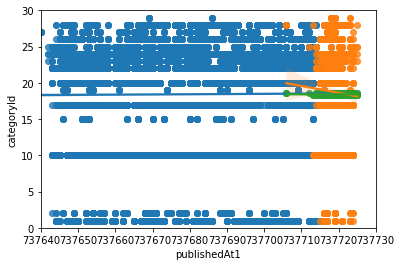

In [46]:
fig, ax = plt.subplots()
sns.regplot(x='publishedAt1', y=y_train, data=df);
sns.regplot(x='publishedAt1', y=y_test, data=df2);
sns.regplot(x='publishedAt1', y=y_pred, data=df2);
plt.ylim(0,30)
plt.xlim(737640, 737730)

Next, I tried a Gradient Boosting Regression model. Hyperparameters were optimized similar to before. 

In [47]:
n_estimators=[int(x) for x in np.linspace(5,100, num=50)]
learning_rate=[float(x) for x in np.linspace(0,0.5,num=10)]
max_depth=[int(x) for x in np.linspace(5, 10, num=2)]
max_depth.append(None)
min_samples_leaf=[1,2,4]
min_samples_split=[2,5,10]
max_features=['auto','sqrt','log2']
loss=['ls','lad','huber','quantile']

In [48]:
random_grid={'n_estimators': n_estimators,
             'max_depth': max_depth,
             'min_samples_leaf': min_samples_leaf,
             'min_samples_split': min_samples_split,
             'learning_rate': learning_rate,
             'max_features': max_features,
             'loss': loss}

In [49]:
gbr=GradientBoostingRegressor()
gbr_random=RandomizedSearchCV(estimator=gbr, param_distributions=random_grid, n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=-1, return_train_score=True)
gbr_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.8min finished


In [50]:
base_model_gbr=GradientBoostingRegressor(random_state=42)
base_model_gbr.fit(X_train, y_train)
base_accuracy_gbr=evaluate(base_model_gbr, X_test, y_test)
print(base_accuracy_gbr)

Model Performance
Average Error: 6.5710 degrees.
Accuracy = -1.79%.
-1.7946441977822758


In [51]:
best_random_gbr=gbr_random.best_estimator_
random_accuracy_gbr=evaluate(best_random_gbr, X_test, y_test)
print(random_accuracy_gbr)

Model Performance
Average Error: 6.5344 degrees.
Accuracy = -3.90%.
-3.896561257816103


Optimizied hyperparameters of the Gradient Boosting Regression model.

In [52]:
print('Improvement of {:0.2f}%.'.format( 100*(random_accuracy_gbr-base_accuracy_gbr)/base_accuracy_gbr))
pprint(gbr_random.best_params_)

Improvement of 117.12%.
{'learning_rate': 0.05555555555555555,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 22}


In [53]:
gbr_reg=GradientBoostingRegressor(n_estimators=51,
                              max_depth=5,
                              max_features='auto',
                              learning_rate=0.1111111111111111,
                              min_samples_leaf=2,
                              min_samples_split=10,
                              loss='huber',
                              random_state=42)
gbr_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.1111111111111111, loss='huber',
                          max_depth=5, max_features='auto', min_samples_leaf=2,
                          min_samples_split=10, n_estimators=51,
                          random_state=42)

In [54]:
y_pred_gbr=gbr_reg.predict(X_test)
print(y_pred_gbr)

[17.14220436 17.14220436 17.14220436 ... 21.51438075 18.84954543
 18.87746256]


The following plot is the output of the Gradient Boosting Regression model that predicted the trending category ID of youtube videos based on the channel Id, view count, likes, dislikes, comment count, published date, and trending date. Blue represents the training data, orange is the test data, and green is the predition of the model. The Gradient Boosting Regression model works much better!

(737640.0, 737730.0)

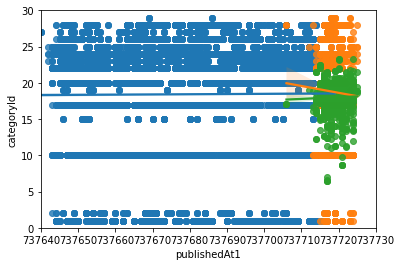

In [55]:
fig, ax = plt.subplots()
sns.regplot(x='publishedAt1', y=y_train, data=df);
sns.regplot(x='publishedAt1', y=y_test, data=df2);
sns.regplot(x='publishedAt1', y=y_pred_gbr, data=df2);
plt.ylim(0,30)
plt.xlim(737640, 737730)